**Author: Sasni**\
**IID ID: 20200168**\
**UOW ID: w1867409**\
**Final Python Notebook 3**\
**Peer Reviewer: - (Defer Student)**\
**Review Date: - (Defer Student)**\
**Module Leader : Mr. Nipuna Senanayake**

## Part 1: Ensemble Classification Models (Mortality Status Prediction)

This section implements a multi-algorithm breast cancer classification framework to predict patient mortality outcomes, following systematic data processing steps for optimal model performance.

In [ ]:
# Mounting Google Drive to access stored datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*This block imports required Python libraries for the classification task. NumPy and Pandas handle data structures and manipulation, scikit-learn provides machine learning algorithms and evaluation tools, while Matplotlib enables data visualization capabilities.*

In [ ]:
# Importing required libraries for data analysis, visualization, and machine learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

*This code retrieves the preprocessed breast cancer dataset from Google Drive storage. The dataset contains patient features and mortality status information ready for classification modeling.*

In [ ]:
# Loading the prepared breast cancer dataset from Google Drive
df_classification = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Python_Notebooks/New_Cleaned_Dataset/cleaned_classification_dataset.csv")

*This code section provides an overview of the dataset structure by showing its dimensions (number of rows and columns) and displaying the first five records to understand the data format before model development.*

In [ ]:
# Displaying dataset dimensions and preview
print("Classification Dataset Information:")
print(f"Shape: {df_classification.shape}")

print("\nFirst 5 rows:")
print(df_classification.head())

Classification Dataset Information:
Shape: (4007, 14)

First 5 rows:
   Age  Sex T_Stage N_Stage 6th_Stage             Differentiated  Grade  \
0   68    0      T1      N1       IIA      Poorly differentiated      3   
1   50    0      T2      N2      IIIA  Moderately differentiated      2   
2   58    0      T3      N3      IIIC  Moderately differentiated      2   
3   58    0      T1      N1       IIA      Poorly differentiated      3   
4   47    0      T2      N1       IIB      Poorly differentiated      3   

    A_Stage  Tumor_Size Estrogen_Status Progesterone_Status  \
0  Regional         4.0        Positive            Positive   
1  Regional        35.0        Positive            Positive   
2  Regional        63.0        Positive            Positive   
3  Regional        18.0        Positive            Positive   
4  Regional        41.0        Positive            Positive   

   Regional_Node_Examined  Regional_Node_Positive Mortality_Status  
0                      24       

*This block transforms all categorical variables into numerical format using LabelEncoder. Machine learning algorithms require numerical inputs, so categorical features like 'Sex' and staging information are converted to integer values. The target variable 'Mortality_Status' is also encoded for consistency.*

In [ ]:
# Converting categorical variables to numerical values for modeling
categorical_cols = ['Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated',
                   'A_Stage', 'Estrogen_Status', 'Progesterone_Status']

# Initialize and apply encoder to each categorical feature
le = LabelEncoder()

for col in categorical_cols:
    df_classification[col] = le.fit_transform(df_classification[col])

# Transform target variable
df_classification['Mortality_Status'] = le.fit_transform(df_classification['Mortality_Status'])

# Verify encoded target values
print("\nUnique values in Mortality_Status after encoding:",
      df_classification['Mortality_Status'].unique())


Unique values in Mortality_Status after encoding: [0 1]


### Data Preparation

*This code separates the dataset into predictor variables (X) and the outcome variable (y). X contains all patient characteristics that will be used to predict 'Mortality_Status', which is isolated in variable y for model training.*

In [ ]:
# Dividing dataset into features and target variable
X = df_classification.drop('Mortality_Status', axis=1)
Y = df_classification['Mortality_Status']

*This code divides the data into training (80%) and testing (20%) subsets using stratified sampling to maintain the same proportion of outcome classes in both sets. The random_state parameter ensures reproducible results, and the shapes are printed to confirm proper splitting.*

In [ ]:
# Splitting data into training and testing sets with stratification
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                   random_state=42, stratify=Y)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (3205, 13)
Testing set shape: (802, 13)


*This code normalizes all features to have zero mean and unit variance. Standardization improves performance for many machine learning algorithms, especially those like Logistic Regression that are affected by feature scales. The scaler parameters are learned from training data only and then applied to both sets.*

In [ ]:
# Feature standardization to improve model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Training

*This section implements a Logistic Regression classifier for the binary mortality prediction. The model is fitted on the standardized training data and then used to generate both class predictions and probability estimates on the test set for comprehensive evaluation.*

In [ ]:
# Training Logistic Regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, Y_train)
Y_pred_lr = lr.predict(X_test_scaled)
Y_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

*This code implements a Gaussian Naive Bayes classifier, which uses probabilistic principles based on Bayes' theorem. Like the Logistic Regression model, it's trained on the standardized data and generates both class predictions and probability scores for evaluation.*

In [ ]:
# Training Gaussian Naive Bayes model
nb = GaussianNB()
nb.fit(X_train_scaled, Y_train)
Y_pred_nb = nb.predict(X_test_scaled)
Y_proba_nb = nb.predict_proba(X_test_scaled)[:, 1]

### Model Evaluation

*This code evaluates the Logistic Regression model's performance using visual and statistical metrics. The confusion matrix displays prediction outcomes (true positives, false positives, true negatives, false negatives), while the classification report provides precision, recall, F1-score, and support metrics for comprehensive performance assessment.*


===== Logistic Regression Results =====

Confusion Matrix:


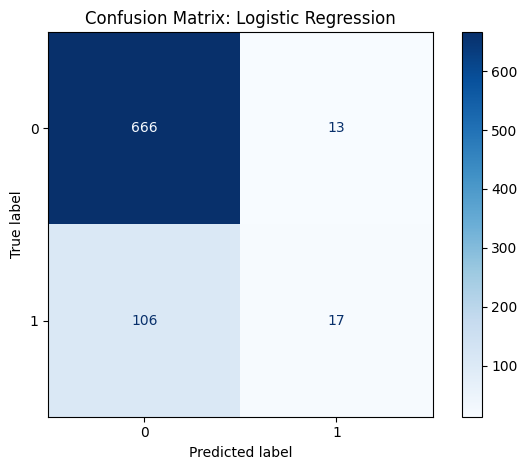


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       679
           1       0.57      0.14      0.22       123

    accuracy                           0.85       802
   macro avg       0.71      0.56      0.57       802
weighted avg       0.82      0.85      0.81       802



In [ ]:
# Assessing Logistic Regression model performance
print("\n===== Logistic Regression Results =====")
print("\nConfusion Matrix:")
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_lr, cmap='Blues')
plt.title("Confusion Matrix: Logistic Regression")
plt.grid(False)
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_lr))

*Similar to the previous evaluation, this code assesses the Naive Bayes model using a confusion matrix visualization and detailed classification report. This consistent approach allows direct comparison between the two algorithms' performance metrics.*


===== Naive Bayes Results =====

Confusion Matrix:


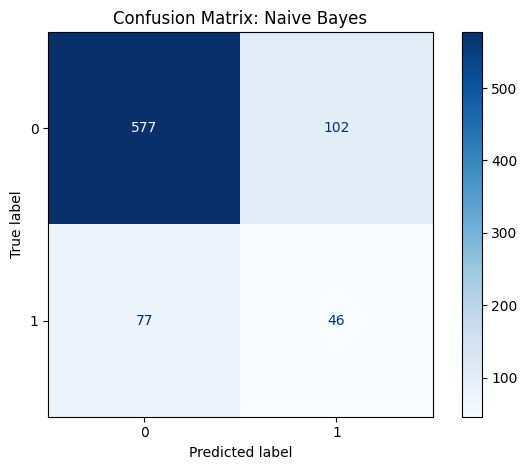


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       679
           1       0.31      0.37      0.34       123

    accuracy                           0.78       802
   macro avg       0.60      0.61      0.60       802
weighted avg       0.79      0.78      0.79       802



In [ ]:
# Assessing Naive Bayes model performance
print("\n===== Naive Bayes Results =====")
print("\nConfusion Matrix:")
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_nb, cmap='Blues')
plt.title("Confusion Matrix: Naive Bayes")
plt.grid(False)
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_nb))

*This visualization creates a Receiver Operating Characteristic (ROC) curve for the Logistic Regression model, which plots true positive rate against false positive rate at various threshold settings. The Area Under the Curve (AUC) value quantifies discriminative ability, with values closer to 1.0 indicating superior performance.*

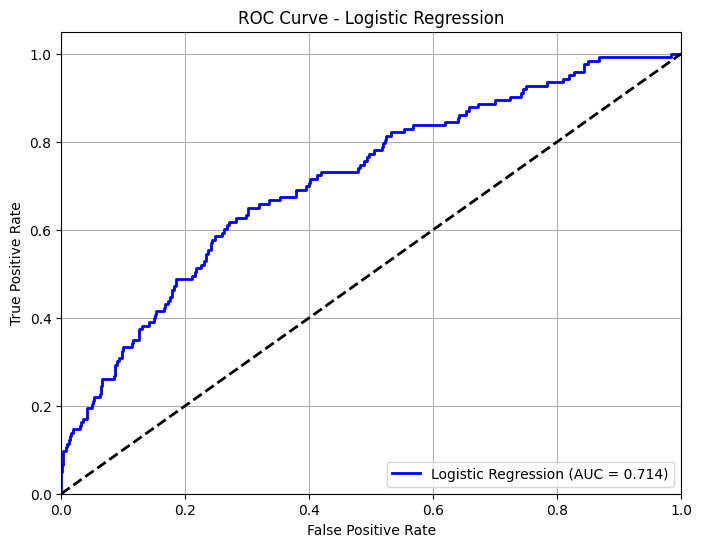

In [ ]:
# Creating ROC curve for Logistic Regression model
plt.figure(figsize=(8, 6))
fpr_lr, tpr_lr, _ = roc_curve(Y_test, Y_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2,
         label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

*This code generates an ROC curve for the Naive Bayes classifier, similar to the previous visualization. This allows for direct visual comparison between the two models' discriminative capabilities across different classification thresholds.*

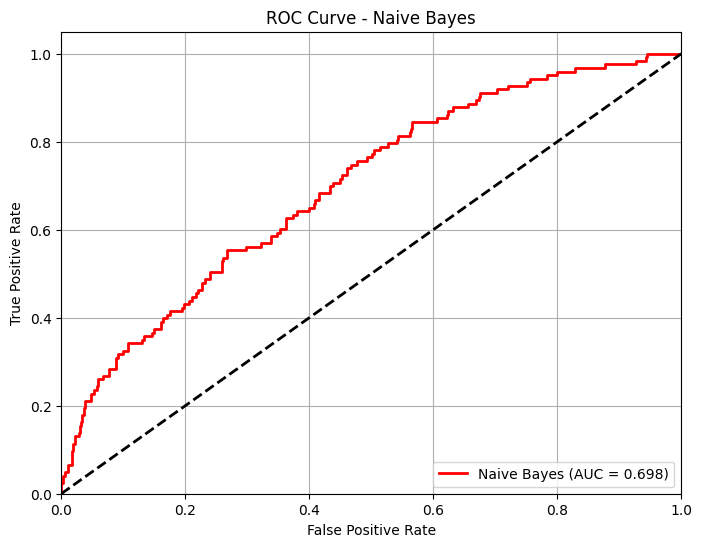

In [ ]:
# Creating ROC curve for Naive Bayes model
plt.figure(figsize=(8, 6))
fpr_nb, tpr_nb, _ = roc_curve(Y_test, Y_proba_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
plt.plot(fpr_nb, tpr_nb, color='red', lw=2,
         label=f'Naive Bayes (AUC = {roc_auc_nb:.3f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Ensemble Modeling

*This code creates an ensemble classifier that combines both Logistic Regression and Naive Bayes models. The 'soft' voting strategy means the ensemble uses probability estimates from each model rather than simple class labels, potentially increasing prediction accuracy through model collaboration.*

In [ ]:
# Building ensemble classifier combining both individual models
ensemble_clf = VotingClassifier(
    estimators=[('lr', lr), ('nb', nb)],
    voting='soft'
)

*This code trains the ensemble classifier using the standardized training data and generates both class predictions and probability estimates on the test data, following the same evaluation approach used for the individual models.*

In [ ]:
# Fitting ensemble model and generating predictions
ensemble_clf.fit(X_train_scaled, Y_train)
Y_pred_ensemble = ensemble_clf.predict(X_test_scaled)
Y_proba_ensemble = ensemble_clf.predict_proba(X_test_scaled)[:, 1]

*This section evaluates the ensemble classifier's performance using the same metrics as the individual models. The confusion matrix and classification report enable direct comparison to determine whether the ensemble approach provides performance benefits over single models.*


===== Ensemble Classifier Results =====

Confusion Matrix:


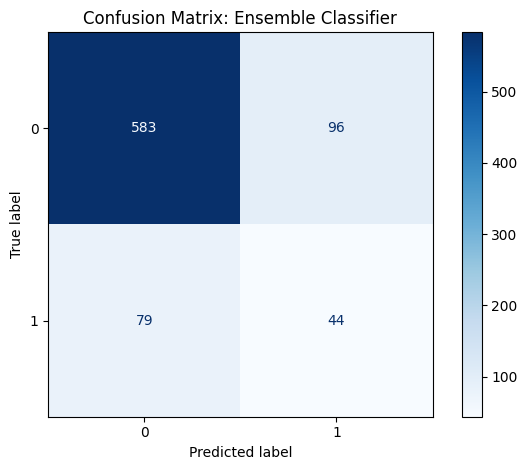


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       679
           1       0.31      0.36      0.33       123

    accuracy                           0.78       802
   macro avg       0.60      0.61      0.60       802
weighted avg       0.79      0.78      0.79       802



In [ ]:
# Evaluating ensemble model performance
print("\n===== Ensemble Classifier Results =====")
print("\nConfusion Matrix:")
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_ensemble, cmap='Blues')
plt.title("Confusion Matrix: Ensemble Classifier")
plt.grid(False)
plt.tight_layout()
plt.show()

print("\nClassification Report:")
ensemble_report = classification_report(Y_test, Y_pred_ensemble)
print(ensemble_report)

*This visualization creates an ROC curve for the ensemble classifier, complementing those created for the individual models. The AUC metric provides a quantitative measure of the ensemble's performance that can be directly compared with the individual models.*

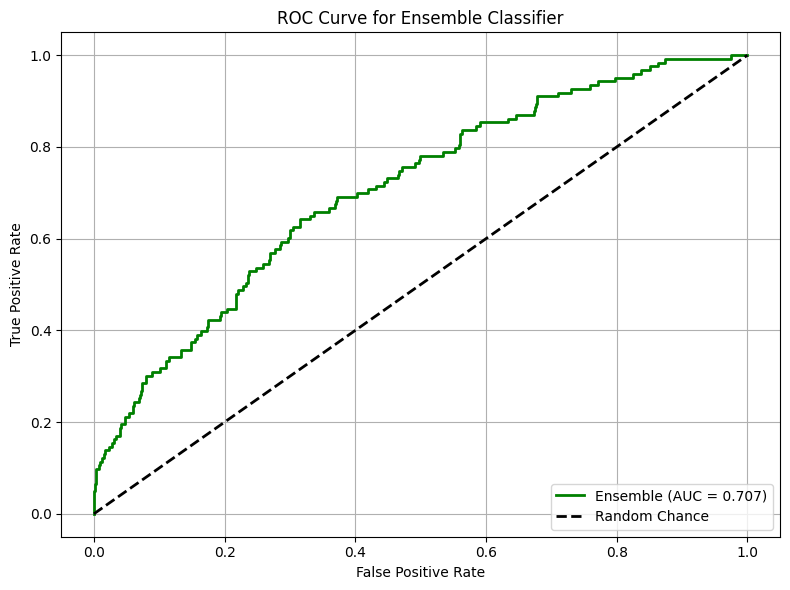

In [ ]:
# Creating ROC curve for ensemble model
fpr_ensemble, tpr_ensemble, _ = roc_curve(Y_test, Y_proba_ensemble)
roc_auc_ensemble = auc(fpr_ensemble, tpr_ensemble)
plt.figure(figsize=(8, 6))
plt.plot(fpr_ensemble, tpr_ensemble, color='green', lw=2,
         label=f'Ensemble (AUC = {roc_auc_ensemble:.3f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2, label="Random Chance")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Ensemble Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

*This code summarizes the performance of all three models (Logistic Regression, Naive Bayes, and ensemble) using their AUC scores. This side-by-side comparison helps identify which approach provides the best discriminative ability for mortality prediction.*

In [ ]:
# Comparing model performance with AUC metrics
print("\n===== Performance Comparison =====")
print(f"Logistic Regression AUC: {roc_auc_lr:.3f}")
print(f"Naive Bayes AUC: {roc_auc_nb:.3f}")
print(f"Ensemble AUC: {roc_auc_ensemble:.3f}")


===== Performance Comparison =====
Logistic Regression AUC: 0.714
Naive Bayes AUC: 0.698
Ensemble AUC: 0.707


## Part 2: Decision Tree Regression Models (Survival Months Prediction)

This section implements decision tree regression models to predict survival duration for breast cancer patients, enabling both accurate prediction and interpretation of feature relationships through hierarchical tree structures.

*This code imports necessary libraries for tree-based regression analysis. Besides the standard data manipulation libraries, it includes specialized modules for decision trees, visualization functions, and regression evaluation metrics.*

In [ ]:
# Importing required libraries for decision tree regression analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

*This code loads and merges two complementary datasets: one with regression variables and another with mortality status. The data is filtered to include only deceased patients, as survival duration prediction is only meaningful for patients with known endpoints. The filtered dataset dimensions and sample records are displayed for verification.*

In [ ]:
# Loading and filtering datasets for survival analysis
df_regression = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Python_Notebooks/New_Cleaned_Dataset/cleaned_regression_dataset.csv")
classification_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Python_Notebooks/New_Cleaned_Dataset/cleaned_classification_dataset.csv")

# Merging datasets and isolating deceased patients
merged_df = df_regression.merge(classification_df[['Mortality_Status']], left_index=True, right_index=True)
dead_df = merged_df[merged_df['Mortality_Status'] == 'Dead'].copy()

# Examining filtered dataset properties
print("Dead patients filtered dataset")
print(f"Shape: {dead_df.shape}")
print("\nFirst 5 rows:")
print(dead_df.head())

Dead patients filtered dataset
Shape: (614, 15)

First 5 rows:
    Age  Sex T_Stage N_Stage 6th_Stage             Differentiated  Grade  \
7    40    0      T2      N1       IIB  Moderately differentiated      2   
10   68    0      T1      N1       IIA  Moderately differentiated      2   
40   57    0      T3      N3      IIIC  Moderately differentiated      2   
46   42    0      T1      N3      IIIC  Moderately differentiated      2   
62   67    0      T1      N1       IIA  Moderately differentiated      2   

     A_Stage  Tumor_Size Estrogen_Status Progesterone_Status  \
7   Regional        30.0        Positive            Positive   
10  Regional        13.0        Positive            Positive   
40  Regional        70.0        Positive            Positive   
46  Regional         9.0        Negative            Negative   
62  Regional        13.0        Positive            Positive   

    Regional_Node_Examined  Regional_Node_Positive  Survival_Months  \
7                       

*This section transforms all categorical variables into numerical format using LabelEncoder. While decision trees can conceptually handle categorical data, scikit-learn's implementation requires numerical inputs, necessitating this preprocessing step.*

In [ ]:
# Converting categorical features to numerical values
categorical_cols = ['Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated',
                   'A_Stage', 'Estrogen_Status', 'Progesterone_Status']

le = LabelEncoder()
for col in categorical_cols:
    dead_df[col] = le.fit_transform(dead_df[col])

*This code isolates the target variable 'Survival_Months' from the predictor features and divides the dataset into training (70%) and testing (30%) subsets. The 'Mortality_Status' column is also removed as it's no longer needed for the regression task.*

In [ ]:
# Preparing features and target variable for regression modeling
X = dead_df.drop(columns=['Survival_Months', 'Mortality_Status'])
Y = dead_df['Survival_Months']

# Creating training and testing subsets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (429, 13)
Testing set shape: (185, 13)


### Decision Tree Models

*This code creates and trains a decision tree regressor without growth constraints. Without limitations, this model will continue splitting nodes until it fits the training data perfectly or until no further improvements can be made, potentially leading to overfitting.*

In [ ]:
# Creating unrestricted decision tree regression model
dt1 = DecisionTreeRegressor(random_state=42)
dt1.fit(X_train, Y_train)
print("\nDT-1 (Fully grown) training completed")


DT-1 (Fully grown) training completed


*This code creates and trains a second decision tree with a maximum depth restriction of 4 levels. This constraint prevents excessive complexity, reducing overfitting risk and improving interpretability, potentially at the cost of some training accuracy.*

In [ ]:
# Creating depth-limited decision tree regression model
dt2 = DecisionTreeRegressor(max_depth=4, random_state=42)
dt2.fit(X_train, Y_train)
print("DT-2 (Pruned to 4 levels) training completed")

DT-2 (Pruned to 4 levels) training completed


### Model Evaluation

*This code evaluates both decision tree models using three standard regression metrics: Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared. MSE and MAE quantify prediction error (lower is better), while R-squared measures variance explanation (higher is better). These metrics help identify which model better generalizes to new data.*

In [ ]:
# Generating predictions and calculating performance metrics
Y_pred_dt1 = dt1.predict(X_test)
Y_pred_dt2 = dt2.predict(X_test)

# Computing error and accuracy metrics
mse_dt1 = mean_squared_error(Y_test, Y_pred_dt1)
mse_dt2 = mean_squared_error(Y_test, Y_pred_dt2)

mae_dt1 = mean_absolute_error(Y_test, Y_pred_dt1)
mae_dt2 = mean_absolute_error(Y_test, Y_pred_dt2)

r2_dt1 = r2_score(Y_test, Y_pred_dt1)
r2_dt2 = r2_score(Y_test, Y_pred_dt2)

# Displaying performance results
print("\n===== Model Evaluation Metrics =====")
print("DT-1 (Fully Grown):")
print(f"MSE: {mse_dt1:.4f}")
print(f"MAE: {mae_dt1:.4f}")
print(f"R-squared: {r2_dt1:.4f}")

print("\nDT-2 (Pruned to 4 levels):")
print(f"MSE: {mse_dt2:.4f}")
print(f"MAE: {mae_dt2:.4f}")
print(f"R-squared: {r2_dt2:.4f}")


===== Model Evaluation Metrics =====
DT-1 (Fully Grown):
MSE: 1136.9730
MAE: 27.1243
R-squared: -1.2456

DT-2 (Pruned to 4 levels):
MSE: 591.8941
MAE: 18.9537
R-squared: -0.1690


*This visualization creates scatter plots comparing actual versus predicted survival months for both models. Points closer to the diagonal red line represent more accurate predictions. These plots help identify prediction patterns, such as systematic over- or under-prediction in certain ranges of survival duration.*

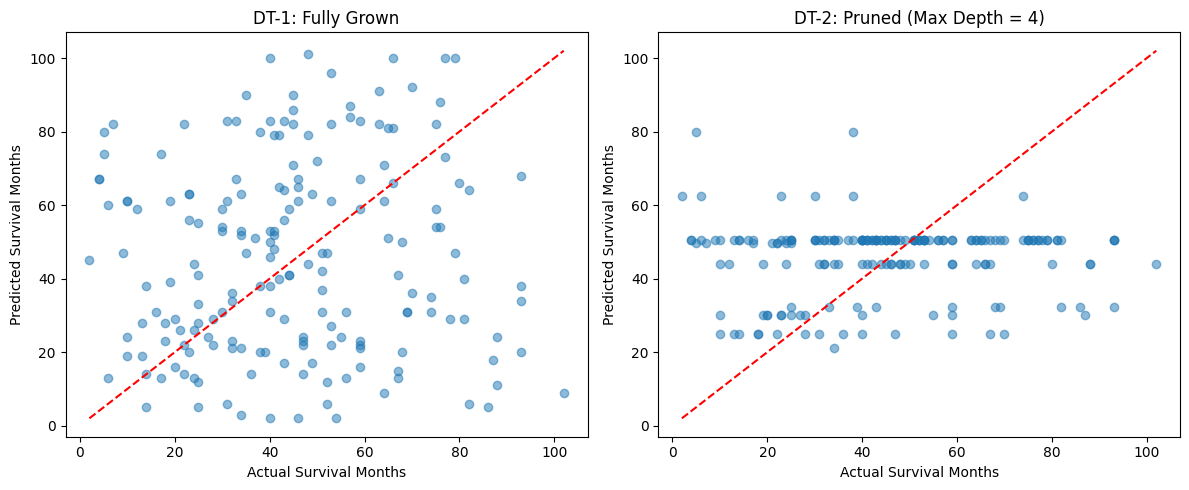

In [ ]:
# Visualizing prediction accuracy with scatter plots
plt.figure(figsize=(12, 5))

# Plot for unrestricted model
plt.subplot(1, 2, 1)
plt.scatter(Y_test, Y_pred_dt1, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel('Actual Survival Months')
plt.ylabel('Predicted Survival Months')
plt.title('DT-1: Fully Grown')

# Plot for depth-limited model
plt.subplot(1, 2, 2)
plt.scatter(Y_test, Y_pred_dt2, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel('Actual Survival Months')
plt.ylabel('Predicted Survival Months')
plt.title('DT-2: Pruned (Max Depth = 4)')

plt.tight_layout()
plt.show()

### Tree Visualization and Interpretation

*This code visualizes both decision tree structures. For the unrestricted tree (potentially very large), only the top three levels are shown for clarity. The depth-limited tree is displayed completely. These visualizations reveal influential features (those near the root) and illustrate the sequential decision-making process through nested splits.*

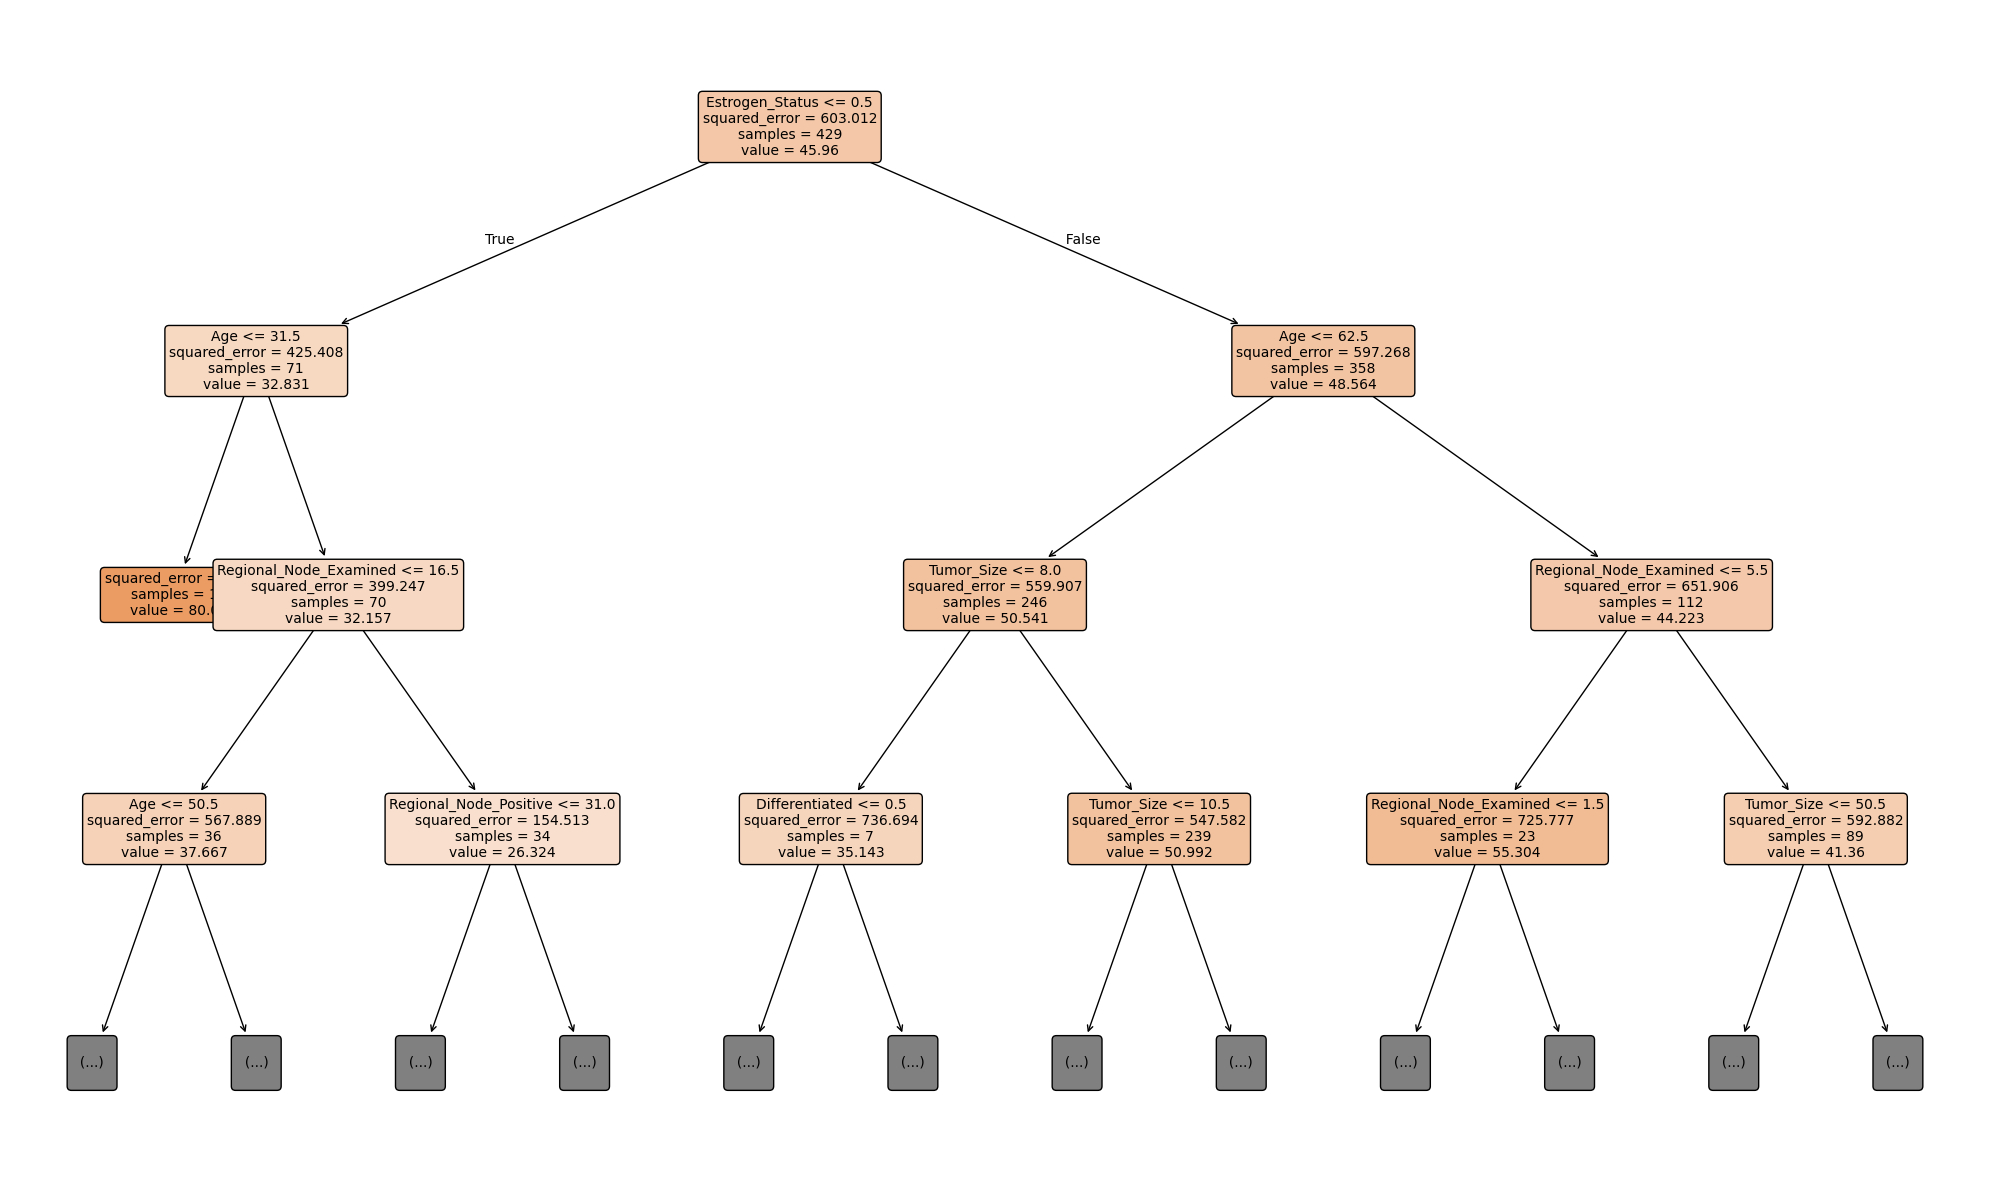

In [ ]:
# Visualizing tree structure of unrestricted model (partial view)
plt.figure(figsize=(20, 12))
plt.title("DT-1: Fully Grown Decision Tree (showing top 3 levels)", fontsize=16)
plot_tree(dt1, filled=True, feature_names=X.columns, rounded=True, max_depth=3, fontsize=10)
plt.tight_layout()
plt.savefig('dt1_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

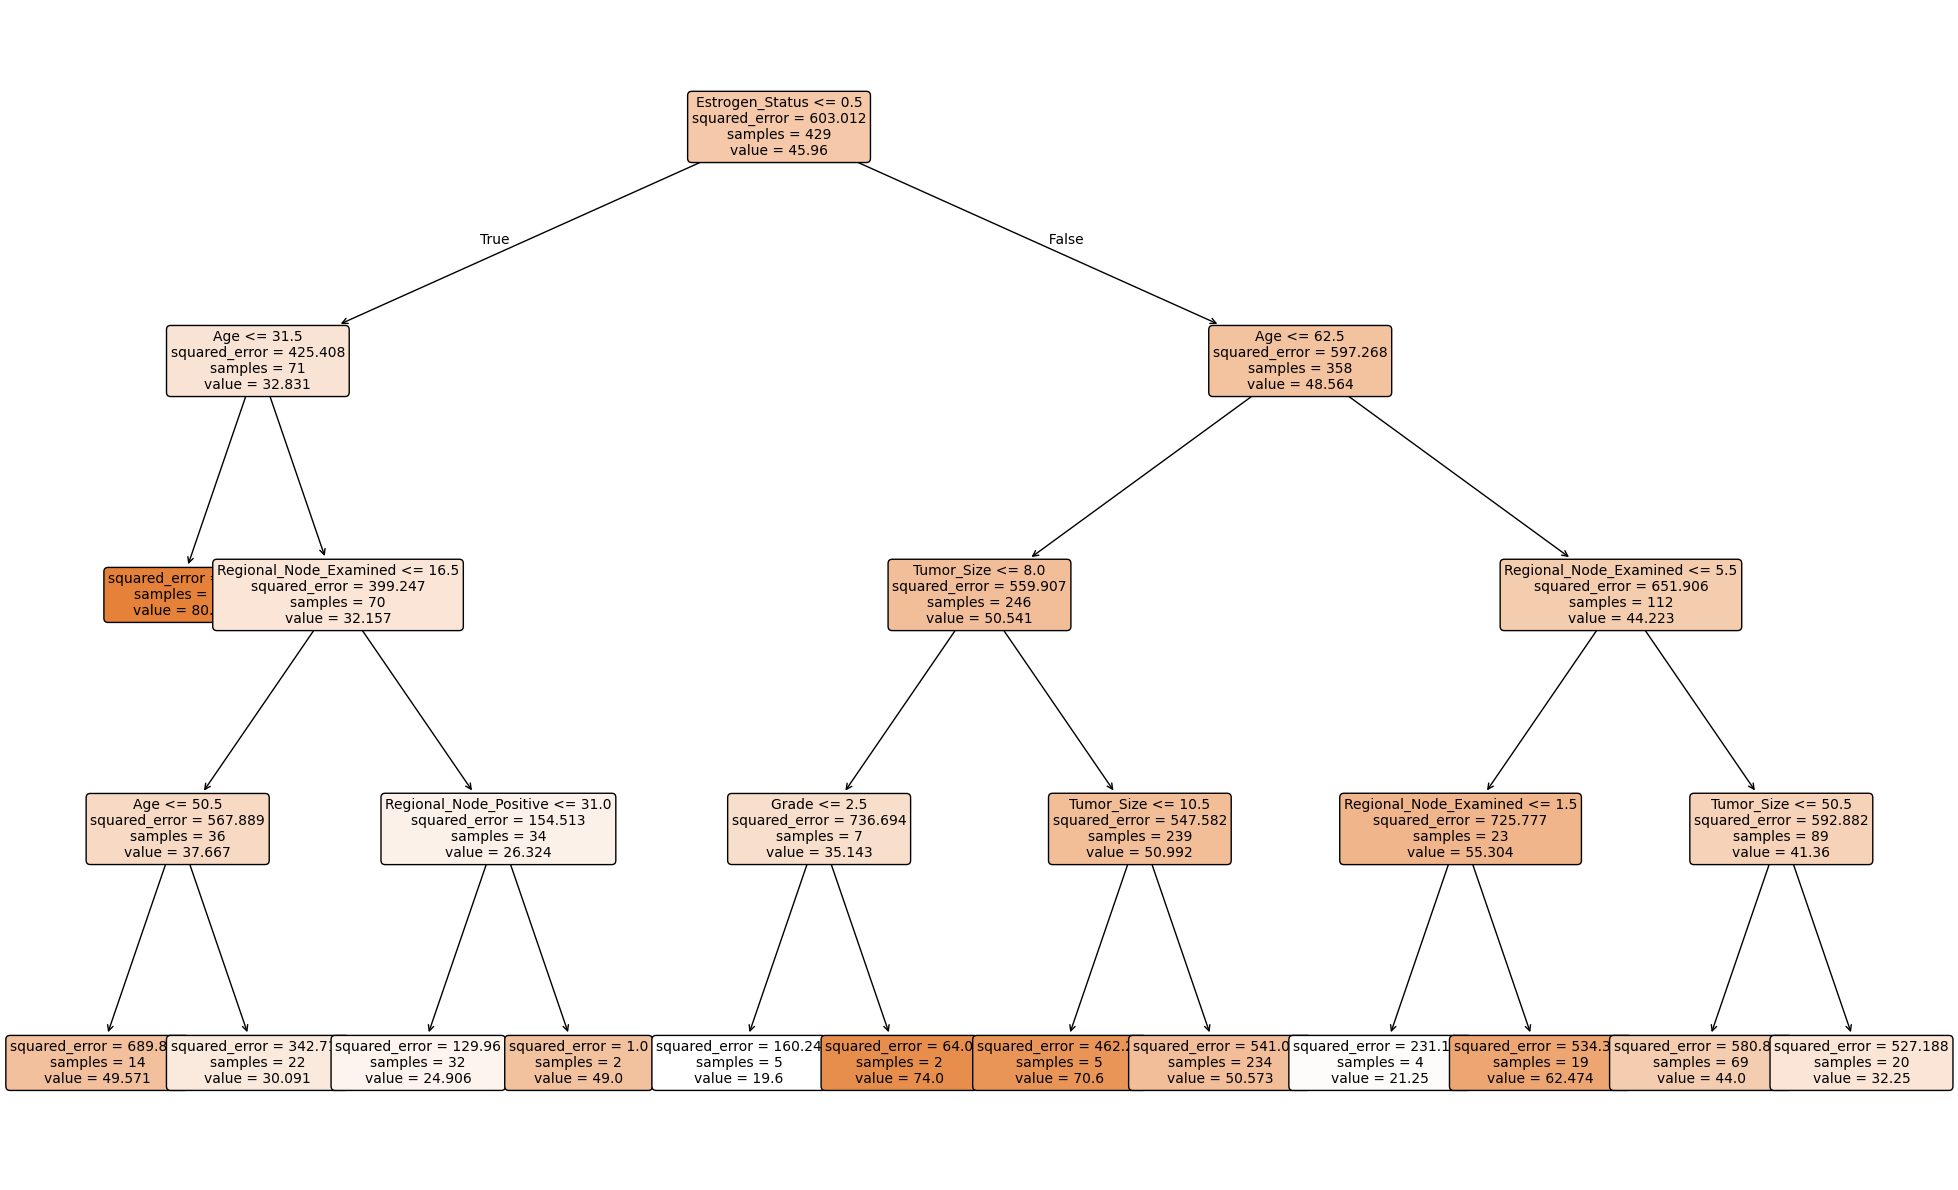

In [ ]:
# Visualizing complete tree structure of depth-limited model
plt.figure(figsize=(20, 12))
plt.title("DT-2: Pruned Decision Tree (Max Depth = 4)", fontsize=16)
plot_tree(dt2, filled=True, feature_names=X.columns, rounded=True, fontsize=10)
plt.tight_layout()
plt.savefig('dt2_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

*This code displays the unique encoded values for each categorical feature post-transformation. Understanding these numeric mappings is essential for interpreting the decision tree visualizations and rules, as the model uses these values for decision thresholds.*

In [ ]:
# Displaying encoded categorical feature mappings
print("\n===== Unique Encoded Values =====")
for col in ['Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated',
            'A_Stage', 'Estrogen_Status', 'Progesterone_Status']:
    print(f"{col}: {dead_df[col].unique()}")


===== Unique Encoded Values =====
Sex: [0 1]
T_Stage: [1 0 2 3]
N_Stage: [0 2 1]
6th_Stage: [1 0 4 2 3]
Differentiated: [0 1 3 2]
A_Stage: [1 0]
Estrogen_Status: [1 0]
Progesterone_Status: [1 0]


### Practical Application

*This code demonstrates practical model application by creating a profile for a hypothetical patient and generating survival predictions from both models. This example illustrates how the models can be used for individual patient prognosis in clinical settings.*

In [ ]:
# Applying models to predict survival for sample patient
print("\n===== Example Patient Prediction =====")
print("Patient ID: B002565")

# Creating patient profile with clinical features
patient_features = pd.DataFrame({
    'Age': [29],
    'Sex': [0],
    'T_Stage': [2],
    'N_Stage': [1],
    '6th_Stage': [3],
    'Differentiated': [1],
    'Grade': [2],
    'A_Stage': [1],
    'Tumor_Size': [41],
    'Estrogen_Status': [0],
    'Progesterone_Status': [1],
    'Regional_Node_Examined': [5],
    'Regional_Node_Positive': [1]
})

# Generating survival predictions from both models
survival_months_dt1 = dt1.predict(patient_features)[0]
survival_months_dt2 = dt2.predict(patient_features)[0]

print(f"DT-1 prediction: {survival_months_dt1:.2f} months")
print(f"DT-2 prediction: {survival_months_dt2:.2f} months")


===== Example Patient Prediction =====
Patient ID: B002565
DT-1 prediction: 80.00 months
DT-2 prediction: 80.00 months


*This code extracts and displays the complete decision rules from the depth-limited tree in text format. These rules reveal the model's prediction logic based on feature thresholds, providing a human-readable representation of the decision-making process.*

In [ ]:
# Extracting decision rules from pruned model
tree_rules = export_text(dt2, feature_names=list(X.columns))
print("\nDecision path rules for DT-2:")
print(tree_rules)


Decision path rules for DT-2:
|--- Estrogen_Status <= 0.50
|   |--- Age <= 31.50
|   |   |--- value: [80.00]
|   |--- Age >  31.50
|   |   |--- Regional_Node_Examined <= 16.50
|   |   |   |--- Age <= 50.50
|   |   |   |   |--- value: [49.57]
|   |   |   |--- Age >  50.50
|   |   |   |   |--- value: [30.09]
|   |   |--- Regional_Node_Examined >  16.50
|   |   |   |--- Regional_Node_Positive <= 31.00
|   |   |   |   |--- value: [24.91]
|   |   |   |--- Regional_Node_Positive >  31.00
|   |   |   |   |--- value: [49.00]
|--- Estrogen_Status >  0.50
|   |--- Age <= 62.50
|   |   |--- Tumor_Size <= 8.00
|   |   |   |--- Grade <= 2.50
|   |   |   |   |--- value: [19.60]
|   |   |   |--- Grade >  2.50
|   |   |   |   |--- value: [74.00]
|   |   |--- Tumor_Size >  8.00
|   |   |   |--- Tumor_Size <= 10.50
|   |   |   |   |--- value: [70.60]
|   |   |   |--- Tumor_Size >  10.50
|   |   |   |   |--- value: [50.57]
|   |--- Age >  62.50
|   |   |--- Regional_Node_Examined <= 5.50
|   |   |   |--

*This code traces the specific decision path followed by the example patient through the pruned decision tree. It shows each node visited, the feature and threshold used at that node, and the patient's corresponding feature value. This detailed trace illustrates precisely how the model arrived at its survival prediction for this individual case.*

In [ ]:
# Tracing decision path for example patient
node_indicator = dt2.decision_path(patient_features)
leaf_id = dt2.apply(patient_features)
path = node_indicator.indices[node_indicator.indptr[0]:node_indicator.indptr[1]]

print("\nDecision path for patient B002565 using DT-2:")
for node_id in path:
    if node_id == leaf_id[0]:
        print(f"Leaf node {node_id} reached - Predicted survival: {survival_months_dt2:.2f} months")
        continue

    feature = dt2.tree_.feature[node_id]
    threshold = dt2.tree_.threshold[node_id]
    feature_name = X.columns[feature]
    feature_value = patient_features.iloc[0, feature]

    direction = "<=" if feature_value <= threshold else ">"
    print(f"Node {node_id}: {feature_name} = {feature_value} {direction} {threshold:.4f}")


Decision path for patient B002565 using DT-2:
Node 0: Estrogen_Status = 0 <= 0.5000
Node 1: Age = 29 <= 31.5000
Leaf node 2 reached - Predicted survival: 80.00 months
